# Statistical Distributions

- def: math functions implemented with python code in the `scipy` library that we can use to model real-world processes

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Uniform Distribution

- discrete `randint`
- continous `uniform`

In [3]:
die_distribution = stats.randint(1, 7)
die_distribution

## Working with Distributions

- `.rvs`: random values, e.g. for simulation
- `.pmf` + `.pdf`: =
- `.cdf` + `.ppf`: <=
- `.sf` + `.isf`: >

In [7]:
die_distribution.rvs([5, 2])

array([[2, 1],
       [3, 4],
       [1, 3],
       [1, 5],
       [1, 6]])

In [8]:
# likelihood of rolling a 4
die_distribution.pmf(4)

0.16666666666666666

In [9]:
# likelihood we roll a 3 or less
die_distribution.cdf(3)

0.5

In [10]:
# likelihood we roll greater than 2
die_distribution.sf(2)

0.6666666666666667

In [11]:
# there is a 1/6 chance I roll greater than what number?
p = 1/6
die_distribution.isf(p)

5.0

In [12]:
# there is a 50% chance I roll what number or less?
die_distribution.ppf(.5)

3.0

### Mini Exercise

- likelihood of rolling a 1
- likelihood of rolling > 4
- 50% of values will be greater than what number

In [13]:
# likelihood of rolling a 1
die_distribution.pmf(1)

0.16666666666666666

In [14]:
# likelihood we roll greater than 4
die_distribution.sf(4)

0.33333333333333337

In [16]:
# 50% of values will be greater than what number
die_distribution.isf(.5)

3.0

## Normal Distribution

- continuous random var
- mean, $\mu$, the center
- standard deviation, $\sigma$, the "spread"

In [17]:
coffee_consumption = stats.norm(10, 1)
coffee_consumption

(array([  5.,   3.,   6.,  29.,  38.,  61., 135., 216., 296., 404., 570.,
        685., 784., 898., 984., 949., 885., 790., 647., 544., 380., 295.,
        157., 121.,  56.,  32.,  21.,   5.,   3.,   1.]),
 array([ 6.37606288,  6.6195406 ,  6.86301831,  7.10649603,  7.34997374,
         7.59345146,  7.83692917,  8.08040689,  8.3238846 ,  8.56736232,
         8.81084003,  9.05431775,  9.29779546,  9.54127318,  9.78475089,
        10.02822861, 10.27170632, 10.51518404, 10.75866175, 11.00213947,
        11.24561718, 11.4890949 , 11.73257261, 11.97605033, 12.21952804,
        12.46300576, 12.70648347, 12.94996119, 13.1934389 , 13.43691662,
        13.68039433]),
 <a list of 30 Patch objects>)

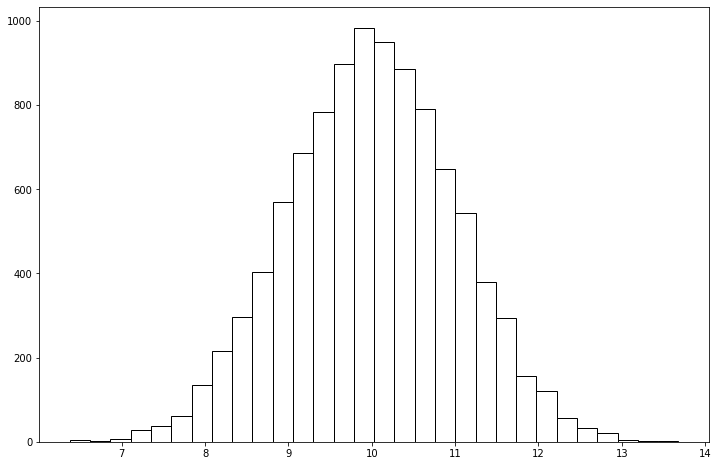

In [20]:
plt.figure(figsize=(12, 8))
plt.hist(coffee_consumption.rvs(10_000), bins=30, fc='white', ec='black')

In [21]:
# likelihood we consume less than (or equal to) 8 liters of coffee on one day
coffee_consumption.cdf(8)

0.022750131948179195

In [22]:
# how little coffee would we have to drink to be in the bottom quarter
# of all days of coffee consumption
coffee_consumption.ppf(.25)

9.325510249803918

In [23]:
# avg internet consumption for a neighborhood in 1250 gb +- 100 gb
# this is historical avg over last 3 months
# Monday we observed 1500 gb. 
# assuming internet usage patterns haven't changed, how likely is it
# we'd see that number due to chance?

stats.norm(1250, 100).sf(1500)

0.006209665325776132

In [24]:
# how much data usage constitutes constitutes the top 10% of all days
stats.norm(1250, 100).isf(.1)

1378.15515655446

In [26]:
stats.norm(1250, 100).ppf(.9)

1378.15515655446

## Binomial Distribution

- discrete random var: number of "successes"
- $n$, number of trials
- $p$, probability of success for one trial

In [28]:
# 70% chance a food truck shows up
# what is likelihood a food truck shows up 2 days out of the week?
# outcome: # of days a food truck shows up
# n == 5 , p == .7

stats.binom(5, .7).pmf(2)

0.1323

In [30]:
# likelihood food truck shows up 3 or less days?
stats.binom(5, .7).cdf(3)

0.47178000000000003

In [31]:
# likelihood a food truck shows up less than 3 days out of the week?
# same as less than or equal to (3 - 1) days
stats.binom(5, .7).cdf(2)

0.16308000000000006

In [32]:
# say we go to grocery store, there's an 80% chance they have toilet paper
# if everyone in curie goes to the store, how likely is it we an all buy tp?
stats.binom(17, .8).pmf(17)

0.0225179981368525

In [33]:
# suppose there is a surprise stats quiz, and you haven't studied
# there are 10 multiple choice questions with 4 answers
# if you guess at random, what is likelihood you pass?
stats.binom(10, .25).sf(6) # means 7 or more questions correct

0.003505706787109374

## Poisson Distribution

- discrete random var: number of events
- $\lambda$: avg rate over time

In [34]:
# codeup students ask 3.5 questions per lecture. 
# what is likelihood >4 questions are asked?
stats.poisson(3.5).sf(4)

0.2745550466903957

<BarContainer object of 12 artists>

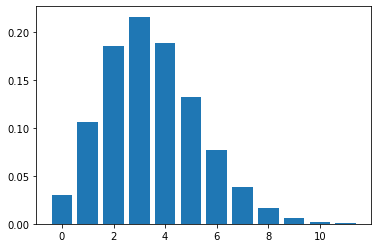

In [35]:
x = np.arange(0, 12)
y = stats.poisson(3.5).pmf(x)

plt.bar(x, y)

In [36]:
# likelihood that 2 or fewer questions are asked?
stats.poisson(3.5).cdf(2)

0.32084719886213414

In [38]:
# on avg 3 food trucks show up per week, 
# whats likelihood a food truck shows up every day - p(5 or more)
stats.poisson(3).sf(4)

0.18473675547622787

<BarContainer object of 9 artists>

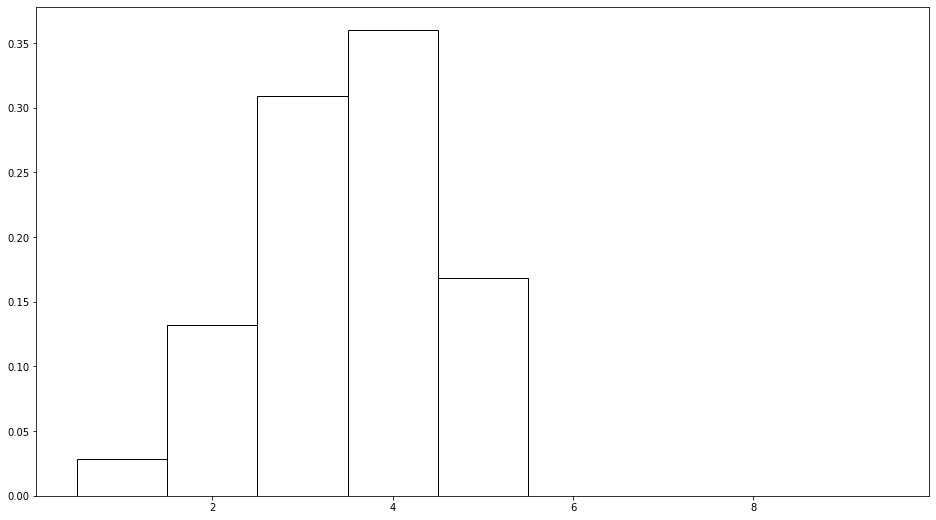

In [41]:
x = np.arange(1, 10)
y = stats.binom(5, .7).pmf(x)

plt.figure(figsize=(16, 9))
plt.bar(x, y, width=1, ec='black', fc='white')